# **Mall Customer Segmentation**

## **Basic Knowledge**
### **Context**
**Customer segmentation** is the process by which we divide our customers up based on common characteristics - such as demographics (if needed) or behaviours, so we can market to those customers more effectively. This dataset contains 200 data customer with 5 features for each rows.

### **Content
**Features Description**:
* **`CustomerID`** ➡ Unique ID assigned to the customer
* **`Gender`** ➡ Gender of the customer
* **`Age`** ➡ Age of the customer
* **`Annual Income (k$)`** ➡ Annual Income of the customer
* **`Spending Score (1-100)`** ➡ Score assigned by the mall based on customer behavior and spending nature

### **Resource**
- 🔗 [Kaggle - Mall Customer Data](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/code?datasetId=42674&sortBy=voteCount)

## **Import Libraries**:

In [1]:
!python --version

Python 3.10.12


In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
import pickle

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Modelling
from sklearn.cluster import KMeans

# Metrics and Model Selection
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings("ignore")

## **Loading Data**

In [3]:
# load dataset
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.shape

(200, 5)

### **Quick Look the Data**

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Inline with the basic knowledge, this dataset contains **200 rows** with **5 features or columns**.
- 1 features identified as categories (`Gender`)
- 4 features identified as numerical (`CustomerID`, `Age`, `Annual Income (k$)`, `Spending Score (1-100)`)

And all of the features does not have any non-values, let's check.

In [7]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Check the **unique value for categorical features**

In [8]:
data['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


**Note:**

Again, inline with the Basic Knowledge.
- There are 2 categories for `'Gender'`: *male and female*.

Later, we will convert this into numerical variable (in data preprocessing)

Let's look the summary for our **Numerical Features**

In [9]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Note:**

For numerical features we will look in a better way with visualization later (distribution, correlation, etc.).
- But it looks like all of the numerical features is a normal distribution, we can relax a not about this. Still, let's explore more insight!

Check if there are any **duplicated data**

In [10]:
# drop duplicates
if data.duplicated().any():
    print('Shape of Dataset before dropping duplicates: {}'.format(data.shape))
    data = data.drop_duplicates()
    temp3 = data.shape[0]
    print('Duplicates exist,and Shape of Dataset after dropping duplicates: {}'.format(data.shape))
    data.reset_index(drop = True, inplace = True)
else:
    print("Duplicates doesn't exist!")

Duplicates doesn't exist!


## **Exploration Data Analysis**

This section contains a basic statistical investigation of a given database. It is a crucial point in any analysis as it allows for a better understanding of the underlying data. This part has two main sections: *distributions* and *correlations*.

### **Univariate Analysis**

**Plot by Gender**

In [11]:
# Define the colors and data
color_list = ['#EB455F', '#BAD7E9']
count_gender = data['Gender'].value_counts()

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=("Gender Distribution (Bar Chart)", "Gender Distribution (Pie Chart)"),
                    specs=[[{"type": "bar"}, {"type": "pie"}]])  # Specify the chart types for each subplot

# Bar chart trace
bar_trace = go.Bar(
    x=count_gender.index,
    y=count_gender.values,
    marker=dict(color=color_list),
    text=count_gender.values,
    textposition='auto'
)

# Pie chart trace
pie_trace = go.Pie(
    labels=count_gender.index,
    values=count_gender.values,
    marker=dict(colors=color_list),
    textinfo='percent+label'
)

fig.add_trace(bar_trace, row=1, col=1)
fig.add_trace(pie_trace, row=1, col=2)

# Update layout
fig.update_layout(
    title_text="Gender Distribution in Dataset",  # Title for the entire figure
    yaxis=dict(title="Count", gridcolor='lightgray'),
    showlegend=False,  # Disable the shared legend
    plot_bgcolor='white',  # Set plot background to white
    width=720
)

# Display the figure
fig.show()

We can see from 200 total dataset, we find that **Female Customers has largest percentage 56% or 112 of total customers than Male Customer (44% or 88)**. And from this we can conclude that there are more female customers than male.



**Distribution Gender based on their Age**

In [12]:
# Create the histogram for Age distribution by Gender
fig = px.histogram(data,
    x='Age',
    color='Gender',
    opacity=0.8,
    nbins=15,
    title="Age Distribution by Gender",
    labels={'Age': 'Age', 'count': 'Count'},  # Axis labels
    color_discrete_sequence=['#BAD7E9', '#EB455F'],
)

# Update the layout for better visualization
fig.update_layout(
    xaxis=dict(range=[15, 75]),  # Age range from 15 to 75
    yaxis=dict(title="Count", gridcolor='lightgray'),
    yaxis_title="Count",
    xaxis_title="Age",
    plot_bgcolor='white',
    showlegend=True,
    width=720
)

# Display the figure
fig.show()

Distribution of **Male age is more uniform than Female Age**.

1. The average of Male Customer Age is 39.8 and Female is 38.1
2. We can observe that most prominent age range is between **30 - 40 years old** for both Male or Female customers.

### **Multivariate Analysis**

In [13]:
num_features = ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']

**Ploting relations  between Age , Annual Income and Spending Score**

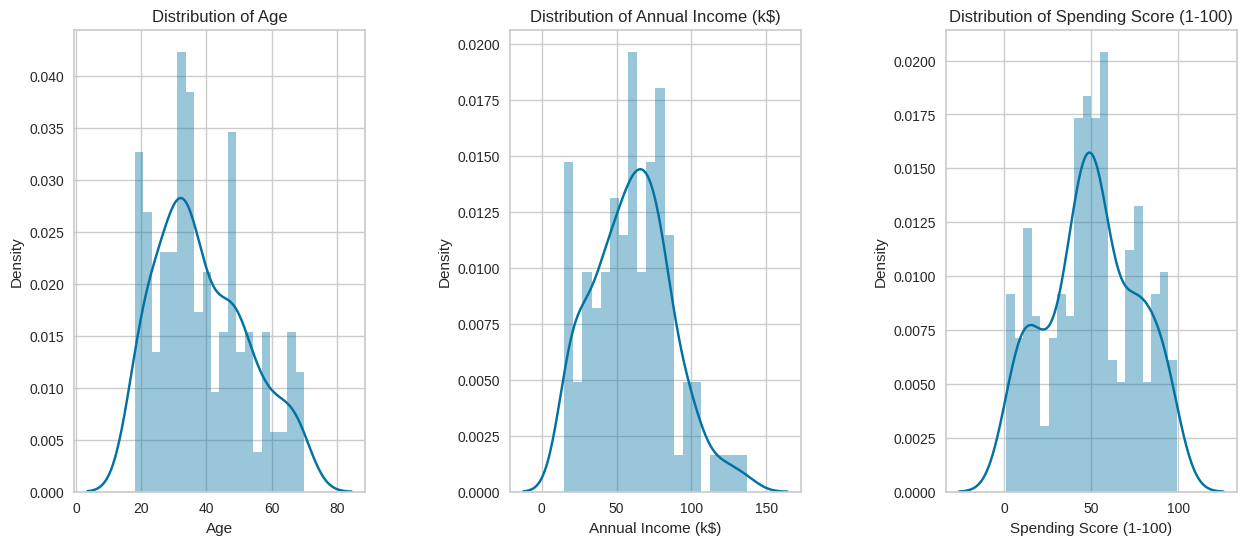

In [14]:
n = 0

plt.figure(1 , figsize = (15 , 6))
for x in num_features:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data[x] , bins = 20)
    plt.title('Distribution of {}'.format(x))

plt.show()

The data isn't too extreme. So we don't have to transform it (or you can do it also - depends on what you want/need).

- Distribution of Age and Annual Income (k$) is positively or rightly skewed.
- Distribution of Spending Score (1-100) has unique pattern. 40 - 60 years old has centered value between 20 and 80 years old.

**Plot Distribution column Age, Annual Income, and Spending Score relate each other.**

In [15]:
# Distribution
fig = px.scatter_matrix(data, dimensions=num_features)
fig.update_layout(width=720)
fig.show()

Between each numerical features (`Age`, `Spending Score`, and `Annual Income`), there are unique corellation and unique distribution.
- **`Spending Score` and `Annual Income`**, the distribution already forms a **segmentation**.
- Between `Age` and `Spending Score`, we can say that people in Young Age and Middle Age are more likely to shopping than Old Age

**Plot Distribution using violin and Boxplot**

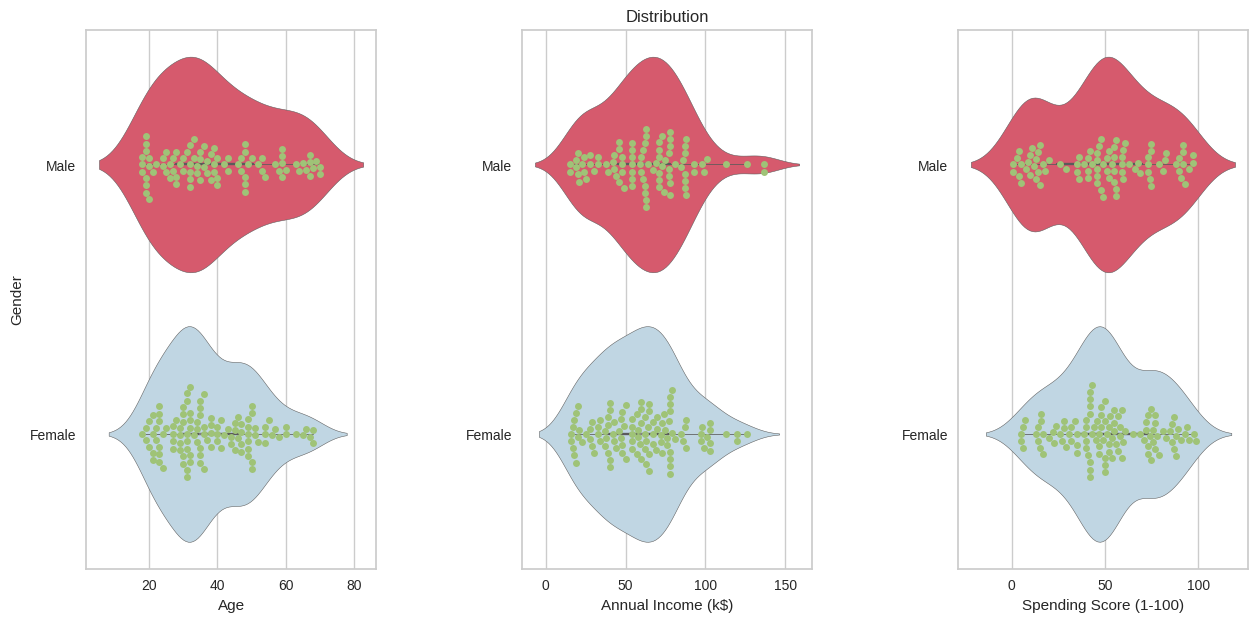

In [16]:
n = 0

plt.figure(1 , figsize = (15 , 7))
for cols in num_features:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.violinplot(x=cols , y='Gender' , data=data , palette=color_list)
    sns.swarmplot(x=cols , y='Gender' , data=data)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Distribution' if n == 2 else '')

plt.show()

- Age range of **female customers** is from **30 to just below 50** whereas **male customers** Age ranges from just below **30 to 50**.

- For both Genders, a bulge at the age of **30 - 40 can be observed**.

- For Annual Income (k$), **female customer's income starts from 40k** whereas male customer's is above this value.

- **Median Annual Income (k$) for both Genders is near about 60k**, Annual Income of male customers tapers very sharply at the apex with some outliers as compared to female customers.

- **Median Spending Score (1-100) of both Genders is same** despite having different starting points of just below 40 & just above 20 for female and male customers respectively.

**Distribution Age and Annual Income**

In [17]:
fig = px.scatter(data, x="Age",
                 y="Annual Income (k$)",
                 color="Gender",
                 hover_data=['Spending Score (1-100)'])

fig.update_traces(marker_size=15)
fig.update_layout(width=720)
fig.show()

- Annual Income datapoint has an influence on Age, but a little bit with Gender. We can say that Customer with **Age 30 - 50** y.o and **20K to 80K Annual Income** having **high significant to buy**.
- Age **60 - 70** has **low value** or annual income.

**Distribution Spending Score and Annual Income**

In [18]:
fig = px.scatter(data,
                 x="Annual Income (k$)",
                 y="Spending Score (1-100)",
                 color="Gender")

fig.update_traces(marker_size=10)
fig.update_layout(width=720)
fig.show()

- Annual Income vs Spending Score (1-100) has formed its **own segmentation**. There are 5 segementation. That we can observe further.
- Customer with **40K - 70K Annual Income have high spending habits**.
- Annual Income with **20K - 40K have 2 segmentation**. As well as with Annual Income between **70K - 100K have 2 segmentataion**. First with Spending Score between 0 - 40 and second with 60 - 100. We can say no matter how much Annual Income the customer have, they are always have the **customer who have high/low spending habits**.

**Correlation Matrix**

In [19]:
data_heat = data.copy()
data_heat['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)

fig = px.imshow(data_heat.corr(), color_continuous_scale='blues', text_auto=".2f")
fig.update_layout(width=720)
fig.show()

The matrix displayed are same! Upper and Lower Matrix has same value
- `CustomerID` display a **very high correlation** with `Annual Income (k$)`. For this we can drop the `CustomerID` later.
- `Spending Score (1-100)` and `Age` display a *negative correlation* i.e if value of one feature increases, then another feature's value decreases and vice-versa (
this has been proven in previous distributions).
- `Annual Income` and `Spending Score` have almost no correlation.

### **Summary of EDA**
1. For the above mall data, based on `Gender` There are **more female customers than male customers**.

2. **Mall customers** can be divided by their Age groups :
    - 20 - 30
    - 30 - 40
    - 40 - 70.

3. **Median Annual Income (k$) of both the genders is about 60k**. It displays 3 groups of values :
    - 0 - 40k
    - 40 - 70k
    - 70 - 140k.

4. **Spending Score (1-100) of female is higher than male customers**. It can also divide the customers into 3 groups :
    - 0 - 40
    - 40 - 60
    - 60 - 100

## **Model Development**
Remember!! it is not a Classification or Regression but a Clustering. So we will use the model to help clustered the data.
**Steps involved in Model Building**:
- Setting up features and target
- Build a pipeline of standard scalar
- Fit all the models on training data
- Use KMeans as a base model
- Apply sillhoutte score to validate the best `K` or total cluster
- Fit model to the data.


**Make a specific column for clusteritation**

Decided to use only 2 features, `spending score` and `annual income`

In [20]:
#Selecting columns for clusterisation with k-means
selected_cols = ["Spending Score (1-100)", "Annual Income (k$)"]
X = data[selected_cols]

In [21]:
X.head()

,Spending Score (1-100),Annual Income (k$)
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


### **Find the Best K-value**

#### **Elbow Method <> Sillhoutte Score**

In [22]:
wcss = []
silhouette_coefficients = []

# Elbow Method
for i in range(2, 11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=2)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Silhoutte
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

In [23]:
# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(rows=1,
                    cols=2,
                    subplot_titles=("Elbow Method", "Silhoutte Score"))  # Specify the chart types for each subplot

x = np.arange(2, 11)
trace1 = go.Scatter(x=x, y=wcss, name='elbow')
trace2 = go.Scatter(x=x, y=silhouette_coefficients, name='silhoutte')

fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)

fig.update_layout(
    title='Elbow Method -- Silhoutte Score',
    plot_bgcolor='white',
    width=1200)

fig.show()

Based on 2 Method above:
- **Elbow Method** ➡ find the most suitable elbow. It shows `K=5` or `K=6` looks good.
- **Silhoutte Score** ➡ find the most higher score. It show `K=5` is the highest score, followed by K=6

Then, we will choose **`K=5` as our Cluster.**

#### **KElbowVisualizer**
Another method to find the suitable K in clustering, similar like ElbowMethod but it not only shows the distortation score, the fit time also

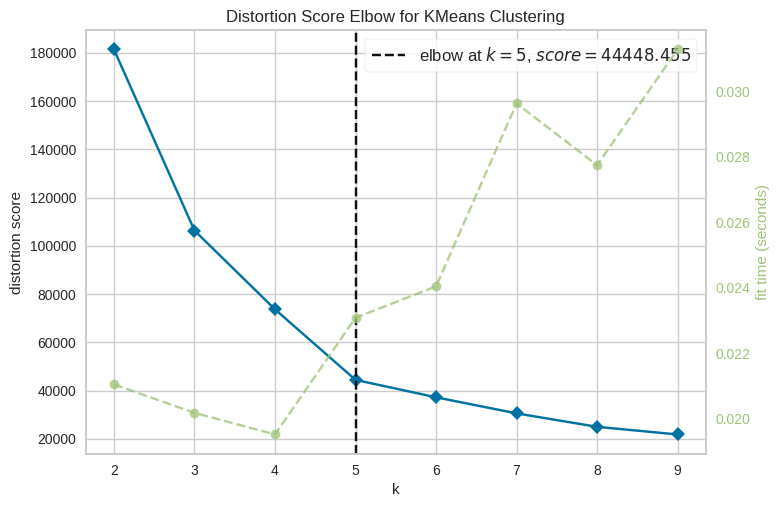

In [24]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10))

visualizer.fit(X)
visualizer.show()
plt.show()

The graph shows the reduction of a distortion score as the number of clusters increases. The underlying algorithm suggests `K=5` clusters. A choice of 5 or 6 clusters seems to be fair.

### **KMeans**

In [25]:
# Applying KMeans model with best K cluster
model = KMeans(n_clusters=5, init='k-means++')

y_label = model.fit_predict(X)

In [26]:
model.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [27]:
# save KMeans model if needed
# with open('model_kmeans.pkl', 'wb') as f:
#     pickle.dump(model, f)

In [28]:
data['Cluster'] = model.labels_ # append labels to points

In [29]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


In [30]:
data['Cluster'].value_counts()

,count
Cluster,
1,81
3,39
2,35
0,23
4,22


**Let's show the Cluster distribution for each Customer**

In [31]:
# Show the final clustering
coloring = ["red", "green", "blue", "purple", "orange"]

fig = px.scatter(data,
                 x="Annual Income (k$)",
                 y="Spending Score (1-100)",
                 color=data["Cluster"].astype(str),
                 color_discrete_sequence=["red", "green", "blue", "purple", "orange"])

fig.update_traces(marker_size=8)
fig.update_layout(title='Clustering Customers',
                  plot_bgcolor='white',
                  width=720,
                  showlegend=True)
fig.show()

**Model Interpretation**
- **Cluster 0** (Orange Color) ➡ earning high but spending less
- **cluster 1** (Blue Color) ➡ more average in terms of earning and spending [**TARGET 1**]
- **cluster 2** (Purple Color) ➡ earning high but spending more [*TARGET 2*]
- **cluster 3** (Red Color) ➡ earning less, spending less
- **Cluster 4** (Green Color) ➡ earning less but spending more

**Shows Scatter in 3D**

In [32]:
fig = px.scatter_3d(data,
                x='Age',
                y='Annual Income (k$)',
                z='Spending Score (1-100)',
                color=data["Cluster"].astype(str),
                color_discrete_sequence=["red", "green", "blue", "purple", "orange"],
                size_max=18)

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig.update_layout(width=1200)
fig.show()

### **Implementing Classification**

In [33]:
clustered = data.copy()

In [35]:
clustered.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4


In [36]:
X = clustered.iloc[:, 1:5]
y = clustered.iloc[:, -1]

In [37]:
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [38]:
y.head()

,Cluster
0,0
1,4
2,0
3,4
4,0


#### **Label Encoder**

In [39]:
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

#### **Split Dataset**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Standardization**

In [41]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [42]:
# save scaler
# with open('sscaler.pkl', 'wb') as f:
#     pickle.dump(sc, f)

#### **Model Classification**

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)

In [44]:
gbdt.fit(X_train,y_train)
y_pred = gbdt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.975

In [47]:
#save model
# with open('model_gdbt.pkl', 'wb') as f:
#     pickle.dump(gbdt, f)

In [46]:
y_pred = gbdt.predict(X_test)

In [48]:
prediction = pd.DataFrame({'Original Value': y_test, 'Predicted Value': y_pred})

# Print the DataFrame
display(prediction)

,Original Value,Predicted Value
95,1,1
15,4,4
30,0,0
158,2,2
128,2,2
115,1,1
69,1,1
170,2,2
174,2,2
45,4,1


**XGClassifier**

In [49]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate=0.3, n_estimators=100)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
accuracy

0.95

**Random Forest**

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
accuracy

0.975

In [57]:
test = clustered.copy()
saving = test.sample(frac=0.2)
saving.reset_index()
saving.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
197,198,Male,32,126,74,3
182,183,Male,46,98,15,2
2,3,Female,20,16,6,0
127,128,Male,40,71,95,3
89,90,Female,50,58,46,1


In [58]:
saving = saving.drop(columns='Cluster', axis=1)
saving.to_csv('sample.csv', index=False)

In [59]:
try_predict = pd.read_csv('sample.csv')
try_predict

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,198,Male,32,126,74
1,183,Male,46,98,15
2,3,Female,20,16,6
3,128,Male,40,71,95
4,90,Female,50,58,46
5,10,Female,30,19,72
6,18,Male,20,21,66
7,76,Male,26,54,54
8,88,Female,22,57,55
9,194,Female,38,113,91


In [61]:
#load scaler
with open('sscaler.pkl', 'rb') as f:
    scaler_predict = pickle.load(f)

#load model
with open('model_gdbt.pkl', 'rb') as f:
    model_predict = pickle.load(f)


# choosing features
# selected_cols = ["Spending Score (1-100)", "Annual Income (k$)"]
predict_data = try_predict.iloc[:, 1:5]
predict_data['Gender'] = predict_data['Gender'].map({'Female':0, 'Male':1})
predict_scaler = scaler_predict.transform(predict_data)
model_try = model_predict.predict(predict_scaler)
model_try

array([3, 2, 0, 3, 1, 4, 4, 1, 1, 3, 3, 1, 1, 3, 3, 1, 0, 2, 1, 1, 2, 4,
       1, 3, 1, 4, 3, 1, 4, 1, 2, 1, 4, 3, 2, 1, 2, 1, 1, 4], dtype=int32)

In [62]:
predict_data['Scaler'] = model_try

In [65]:
predict_data[predict_data['Annual Income (k$)'] == 126]

,Gender,Age,Annual Income (k$),Spending Score (1-100),Scaler
0,1,32,126,74,3


In [66]:
clustered[clustered['Annual Income (k$)'] == 126]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
196,197,Female,45,126,28,2
197,198,Male,32,126,74,3
